In [283]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib # package required to interact with live webpage
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome import service
import time
import math

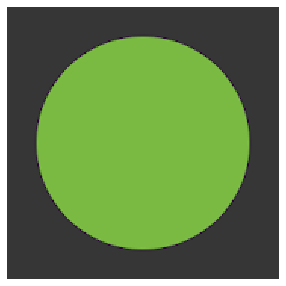

In [38]:
### Ejemplo Con peapod 
# Scrape data from website
site_url='https://play.google.com/store/apps/details?id=com.peapod.app.mobile.droid'
r = urllib.request.urlopen(site_url)
site_content = r.read().decode('utf-8')

# Saving scraped HTML to .html file (for later processing)
with open('saved_page.html', 'w') as f:
    f.write(site_content)

# Use html.parser to create soup
s = BeautifulSoup(site_content, 'html.parser')

### descarga la imagen de whatsapp como ejemplo 
response = requests.get(s.find_all("img")[0]['src'])
img = Image.open(BytesIO(response.content))
plt.figure(figsize = (5,5))
plt.imshow(img, cmap=plt.cm.gray);    # plot the image
plt.axis('off');
img.save('Imagenes/peapod.jpg', 'JPEG')

https://play.google.com/store


In [194]:
clean=pd.read_csv('google_clean.csv')
clean.head()

,Unnamed: 0,App Name,Category,Rating,Reviews,Installs,Size,size_depends_on_device,Price,Content Rating,Last Updated,Minimum Version,Minimum Version_depends_on_device,Latest Version,Latest Version_depends_on_device
0,0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",NaN,1,0,Everyone,"March 29, 2019",NaN,1,NaN,1
1,1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",NaN,1,0,Everyone,"March 29, 2019",NaN,1,NaN,1
2,2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1400.0,0,0,Everyone,"September 20, 2018",5.0,0,2.2,0
3,3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16000.0,0,0,Everyone,"March 22, 2019",4.2,0,4.1,0
4,4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",NaN,1,$5.99,Everyone,"April 1, 2019",NaN,1,NaN,1


In [240]:
### obtener la url de una aplicacion en google desde el nombre a traves de opera 
##define funcion que a traves de minibot busca la app y guarda la url 
from selenium import webdriver
def get_url(nombre_app):
    opera_profile = '/Users/richardgil/Library/Application Support/com.operasoftware.Opera'  # relevant for Windows 7 and above
    options = webdriver.ChromeOptions()
    options.add_argument('user-data-dir=' + opera_profile)
    opera_driver = webdriver.Opera(executable_path='/Users/richardgil/Downloads/operadriver_mac64/operadriver',options=options)
    opera_driver.get('https://play.google.com/store/')
    opera_driver.find_element_by_xpath("//*[@id='gbqfq']").send_keys(nombre_app)
    opera_driver.find_element_by_xpath("//*[contains(@class, 'gbqfi') and contains(@class, 'gb_wc')]").click()
    time.sleep(5)
    aux=opera_driver.find_elements_by_xpath("//*[contains(@class, 'poRVub')]")
    piv=''
    for j,i in enumerate(aux):
        if (piv=='') & (i.get_attribute('href').split('/')[4]=='apps'):
            piv=i.get_attribute('href')
    
    opera_driver.close()
    opera_driver.quit()
    return piv

In [248]:
urls=[]
for j,i in enumerate(clean['App Name']): 
    print(j)
    urls.append(get_url(i))


0
1
2
3


KeyboardInterrupt: 

In [238]:
clean.shape

(267052, 15)

In [245]:
urls_data_frame=pd.DataFrame()
urls_data_frame['url']=urls

In [247]:
urls_data_frame.to_csv('urls.csv')

In [249]:
### Se importan urls
urls_data_frame=pd.read_csv('urls.csv')

In [250]:
urls_data_frame.head()

,Unnamed: 0,url
0,0,https://play.google.com/store/apps/details?id=...
1,1,https://play.google.com/store/apps/details?id=...
2,2,https://play.google.com/store/apps/details?id=...
3,3,https://play.google.com/store/apps/details?id=...
4,4,https://play.google.com/store/apps/details?id=...


In [264]:
### se define funcion para obtener las imagenes desde las urls 
def get_image(nombre_param,url_param):
    site_url=url_param
    r = urllib.request.urlopen(site_url)
    site_content = r.read().decode('utf-8')

    # Saving scraped HTML to .html file (for later processing)
    with open('saved_page.html', 'w') as f:
        f.write(site_content)

    # Use html.parser to create soup
    s = BeautifulSoup(site_content, 'html.parser')

    ### descarga la imagen de whatsapp como ejemplo 
    response = requests.get(s.find_all("img")[0]['src'])
    img = Image.open(BytesIO(response.content))
    img.save('Imagenes/'+nombre_param+'.png', 'PNG')


In [252]:
urls_data_frame.shape

(368, 2)

In [257]:
urls_data_frame['url'][0]

'https://play.google.com/store/apps/details?id=work.backend.android59f05ca46b62d'

In [293]:
for i in range(91,368):
    print(i)
    print(clean['App Name'][i])
    print(urls_data_frame['url'][i])
    if isinstance(urls_data_frame['url'][i],str):
        get_image(clean['App Name'][i],urls_data_frame['url'][i])

91
Aurora Legend
nan
92
RAID: Shadow Legends
https://play.google.com/store/apps/details?id=com.plarium.raidlegends
93
My Little Pony Pocket Ponies
https://play.google.com/store/apps/details?id=com.budgestudios.googleplay.MyLittlePonyPocketPonies
94
Decurse � A New Magic Farming Game
https://play.google.com/store/apps/details?id=com.bigfishgames.tidaltowngooglef2p
95
Rolly Running
https://play.google.com/store/apps/details?id=com.bdj.vortexDroid
96
Alita: Battle Angel - The Game
https://play.google.com/store/apps/details?id=com.gamesclub.battle.girl
97
Hidden Hotel
https://play.google.com/store/apps/details?id=com.whaleapp.hiddenhotel
98
Skylanders� Ring of Heroes
https://play.google.com/store/apps/details?id=com.com2us.slroh.normal.freefull.google.global.android.common
99
Wonder Park Magic Rides
https://play.google.com/store/apps/details?id=com.pixowl.wonderpark
100
Swing Legend
https://play.google.com/store/apps/details?id=com.semeevs.swingrider
101
Difference Find Master
https://play

173
Walmart MoneyCard
https://play.google.com/store/apps/details?id=com.walmart.mg
174
Veryfi - expenses, receipts & projects
https://play.google.com/store/apps/details?id=com.iqboxyinc.iqboxy
175
Branch - Personal Finance Loans
https://play.google.com/store/apps/details?id=com.gopaysense.android.boost
176
Stock Quote
https://play.google.com/store/apps/details?id=com.investorvista.stockspyod
177
Huntington Mobile
https://play.google.com/store/apps/details?id=com.huntingtonhospital.engage
178
Acorns - Invest Spare Change
https://play.google.com/store/apps/details?id=com.rewardable.acornhunt
179
Wonder for Dash & Dot Robots
https://play.google.com/store/apps/details?id=com.makewonder.wonder
180
King of Math Junior - Free
https://play.google.com/store/apps/details?id=com.oddrobo.komjfree
181
Kindergarten Kids Learning: Fun Educational Games
https://play.google.com/store/apps/details?id=com.greysprings.kindergarten8
182
Duck Duck Moose Reading
https://play.google.com/store/apps/details?id=

249
Learning Letters for Toddlers - Baby ABC for Kids
https://play.google.com/store/apps/details?id=com.rvappstudios.abc_kids_toddler_tracing_phonics
250
Kids Education (Preschool)
https://play.google.com/store/apps/details?id=forqan.tech.iq_brain_trainer
251
Make Pasta Food Kitchen Fever
https://play.google.com/store/apps/details?id=com.cb.cookingchallenge.foodmaking
252
Letter Quiz: Alphabet Aquarium
https://play.google.com/store/apps/details?id=air.cz.cfc.androidgp.ToddlerAquariumLite
253
Animal Hair Salon Australia - Pet Beauty & Fashion
https://play.google.com/store/apps/details?id=com.tutotoons.app.animalhairsalonaustralia.free
254
Green Eggs and Ham - Dr. Seuss
https://play.google.com/store/apps/details?id=com.oceanhouse_media.bookgreeneggsandham_app
255
Rosetta Stone: Learn Languages
https://play.google.com/store/apps/details?id=air.com.rosettastone.mobile.CoursePlayer
256
SketchBook - draw and paint
https://play.google.com/store/apps/details?id=com.adsk.sketchbook
257
Kids Doo

332
Transmission
https://play.google.com/store/apps/details?id=com.ap.transmission.btc
333
Jane's Farm: interesting game
https://play.google.com/store/apps/details?id=com.realore.FarmUp
334
Brain Games
https://play.google.com/store/apps/details?id=jalfonso.brain.games
335
Lumosity: #1 Brain Games & Cognitive Training App
https://play.google.com/store/apps/details?id=air.net.npapp.neuroactive
336
Elevate - Brain Training Games
https://play.google.com/store/apps/details?id=air.net.npapp.neuroactive
337
Happy Chef 2
https://play.google.com/store/apps/details?id=com.appcraft.unicorn
338
Peak � Brain Games & Training
https://play.google.com/store/apps/details?id=com.brainbow.peak.app
339
QuizUp
https://play.google.com/store/apps/details?id=com.quizup.core
340
Word Crack Free
https://play.google.com/store/apps/details?id=com.etermax.wordcrack.lite
341
Sudoku Free
https://play.google.com/store/apps/details?id=easy.sudoku.puzzle.solver.free
342
Puzzles with Matches
https://play.google.com/stor

In [294]:
import antigravity

In [295]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
